82.2172960585812
82.21729605859866
82.2172960570543
82.21729605770378
82.21729602662607
82.21729086544029
82.21729592218219
82.217296043945
82.21729598875028
82.21729614304805
82.21729582018307
18.82523594704083
18.825235947040536
18.82523594597055
18.82523594667164
18.825235949265487
18.825233917872257
18.825235892302107
18.82523594762491
18.825235909710496
18.825235983787
18.825235928860188
165.27587330190502
76.24494498871533
17.697132140718995
17.697132140719102
17.69713214027238
17.697132140673162
17.69713214577396
17.6971322225414
17.697132137737757
17.697132142379587
17.697132128844622
17.69713215093284
17.697132147565288
17.6038439268834
17.603843926883403
17.60384392649584
17.60384392683984
17.60384392960148
17.603843903668082
17.60384392814234
17.60384392748022
17.60384391314643
17.603843940023364
17.60384392726469
17.719683543792993


/home/leo/anaconda3/envs/pyGIS/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


17.580322297885008
17.580322297883136
17.580322297777286
17.580322297847818
17.580322298624218
17.580322323076885
17.58032229801263
17.58032229810154
17.58032228603968
17.58032230951002
17.580322297547088
inversion is done
Shear Velocity [21.69728272 36.63109137 66.94445612]
P wave velocity: [860.47955124 630.92218572 779.6713748 ]
Density [1039.06046671 1063.8884953  1041.52777046]
ra/rb 0.2692876189117617


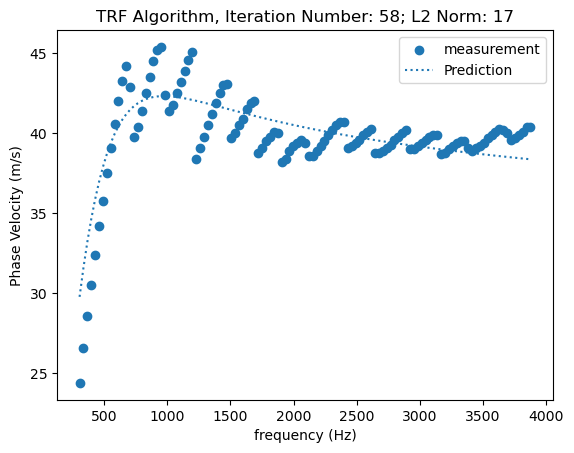

In [3]:
import numpy as np
import CMASW2SPH

filename = 'Vel_freq_dispersion_data_picks_Kiwi_vx09.dat'#'data_cmasw_mode1_kiwi.dat'#'NWZ1_30112023_Dispersion_Curve.txt'#'NWZ1_30112023_dispersion.txt'#'data_cmasw.txt' #

n = 3
R = 0.028405
vp = [700, 450, 700]
vs = [50, 30, 50]
rho = [1050,1050, 1050]
nu = [0.5]
x_initial= vp + vs + rho + nu  
lb = [100, 100, 100]  + [10, 5, 5]  + [1010, 1010, 1010] + [0.1]  
ub = [1600, 1600, 1600] + [100, 120, 120] + [1100, 1100, 1100] + [0.9] 

test = CMASW2SPH.cmasw2(filename, np.array(x_initial), np.array(lb), np.array(ub), R)
test.inverse() 

`Shear Velocity [21.69728272 36.63109137 66.94445612]
P wave velocity: [860.47955124 630.92218572 779.6713748 ]
Density [1039.06046671 1063.8884953  1041.52777046]
ra/rb 0.2692876189117617`

In [4]:
%time
x = test.para[-1]
vp = np.array(x[:test.num])
vs = np.array(x[test.num:2*test.num])  
rho = np.array(x[2 * test.num:3 * test.num]) 
nu = np.array(x[3 * test.num])   
print('Vp :' , vp)
print('Vs :' , vs)
print('rho :' , rho)
print('eta (r2/r1) :' , nu)
vels = test.velocity(test.omega, vp, vs, rho, nu)

CPU times: user 0 ns, sys: 3 μs, total: 3 μs
Wall time: 7.15 μs
Vp : [860.47955124 630.92218572 779.6713748 ]
Vs : [21.69728272 36.63109137 66.94445612]
rho : [1039.06046671 1063.8884953  1041.52777046]
eta (r2/r1) : 0.26928763381292287


Text(0, 0.5, 'Velocity (m/s)')

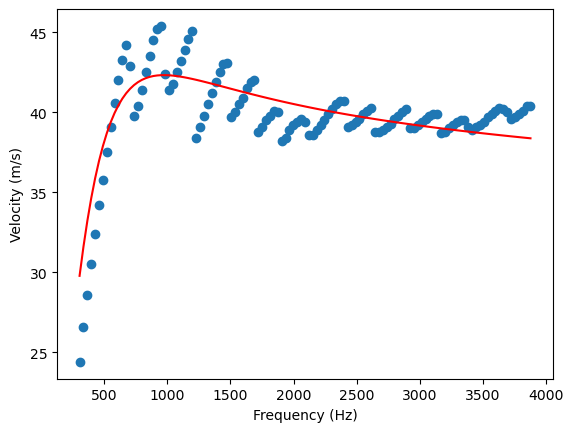

In [5]:
import numpy as np
import matplotlib.pyplot as plt
filename = 'Vel_freq_dispersion_data_picks_Kiwi_vx09.dat'
F, V = np.loadtxt(filename, delimiter = ' ', unpack = True)
plt.plot(test.omega/(2*np.pi), vels, c='r')
plt.scatter(F,V)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Velocity (m/s)')

In [6]:
test.jac[0].shape

(117, 10)

In [7]:
J = test.jac[0] # Jacovian of last iteraton
#vp, vs = test.para[-1] # Parameters of last iteration
yd = test.y_data # Observed data
ym = vels # Forward model

# Standard error of parameters estimated
residuals = yd - ym # Residuals from the fit
cov_params = np.linalg.inv(np.dot(J.T, J))  # Covariance matrix of parameters
var_residuals = np.sum(residuals**2) / (len(yd) - len(test.para[-1]))  # Variance of residuals
# Calculate standard errors of the estimated parameters
se_params = np.sqrt(np.diag(cov_params * var_residuals))
print('Errors of params:' , se_params)

Errors of params: [3.15289017e+07 2.66169316e+06 4.86407830e+06 1.76426655e+05
 3.48656853e+01 4.06897175e+03 2.64295457e+07 1.97254639e+07
 1.93090984e+07 4.87118374e+02]


In [ ]:
# M = np.c_[test.omega/(2*np.pi), np.array(vels)]
# np.savetxt('Cooke_Rand_Inversion_test_data.dat', M,  delimiter =' ')